In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import stats
import seaborn as sns
import os
from scipy.stats import pearsonr
import math 
import seaborn as sns

In [2]:
path = os.getcwd()
print(path)
path_new='D:\CE 705 TRB\Sumo'
os.chdir(path_new)

C:\Users\19195


In [6]:
path = os.getcwd()
print(path)

D:\Term Project\project


In [8]:
data=pd.read_csv('D:\CE 705 TRB\Sumo\w99.csv')

In [5]:
datar=pd.read_csv('D:\AV data\Vicolungo-20210204T205759Z-001\Vicolungo\VC_JRC_260219_part2_mixed.csv')

In [6]:
data.head()

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,89.87,TV,e1_0,5.10,0.0,37.08,TV,-182.88,61.95
1,0.1,89.87,TV,e1_0,8.76,0.0,36.63,TV@TV,-179.24,61.96
2,0.2,89.87,TV,e1_0,12.38,0.0,36.18,TV@TV,-175.64,61.97
3,0.3,89.87,TV,e1_0,16.00,0.0,36.21,TV@TV,-172.05,61.98
4,0.4,89.87,TV,e1_0,19.63,0.0,36.26,TV@TV,-168.45,61.98


In [7]:
datar

,Time,Speed1,Lat1,Lon1,Alt1,E1,N1,U1,VE1,VN1,...,VU5,IVS1,IVS2,IVS3,IVS4,Driver1,Driver2,Driver3,Driver4,Driver5
0,0.1,36.103594,0.796218,0.147246,347.723034,-10033.789800,-5012.929533,42.540200,31.185030,18.192367,...,0.582000,52.558617,37.545136,37.050968,33.481743,Human,ACC,ACC,ACC,ACC
1,0.2,36.155810,0.796218,0.147247,347.741870,-10030.662940,-5011.112525,42.565376,31.196502,18.276223,...,0.573711,52.604372,37.531712,37.088280,33.580852,Human,ACC,ACC,ACC,ACC
2,0.3,36.207777,0.796219,0.147247,347.761388,-10027.537160,-5009.286819,42.591237,31.207060,18.360895,...,0.560000,52.653875,37.515299,37.125508,33.682695,Human,ACC,ACC,ACC,ACC
3,0.4,36.256624,0.796219,0.147248,347.781471,-10024.412370,-5007.451400,42.617666,31.214345,18.444711,...,0.546164,52.704980,37.498505,37.163020,33.784318,Human,ACC,ACC,ACC,ACC
4,0.5,36.299472,0.796219,0.147249,347.802000,-10021.288480,-5005.605254,42.644547,31.216000,18.526000,...,0.536000,52.754582,37.485154,37.201241,33.883375,Human,ACC,ACC,ACC,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,705.8,30.598356,0.797602,0.150737,293.759898,5560.272792,3798.466060,-5.123727,28.976269,9.822402,...,-0.412067,40.406152,31.731040,35.007871,35.191890,Human,ACC,ACC,ACC,ACC
7058,705.9,30.608491,0.797603,0.150738,293.734051,5563.158497,3799.438744,-5.152666,28.983519,9.831817,...,-0.426000,40.414766,31.706644,34.967359,35.201568,Human,ACC,ACC,ACC,ACC
7059,706.0,30.618620,0.797603,0.150738,293.709455,5566.045675,3800.413425,-5.180359,28.990634,9.841130,...,-0.439802,40.427117,31.680134,34.927262,35.201817,Human,ACC,ACC,ACC,ACC
7060,706.1,30.629461,0.797603,0.150739,293.685106,5568.934251,3801.389438,-5.207808,28.998499,9.850228,...,-0.450000,40.443657,31.650704,34.887633,35.198428,Human,ACC,ACC,ACC,ACC


In [8]:
data['serial']=data['timestep_time']*10
data=data.set_index('serial')
data

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
serial,,,,,,,,,,
0.0,0.0,89.87,TV,e1_0,5.10,0.0,37.08,TV,-182.88,61.95
1.0,0.1,89.87,TV,e1_0,8.76,0.0,36.63,TV@TV,-179.24,61.96
2.0,0.2,89.87,TV,e1_0,12.38,0.0,36.18,TV@TV,-175.64,61.97
3.0,0.3,89.87,TV,e1_0,16.00,0.0,36.21,TV@TV,-172.05,61.98
4.0,0.4,89.87,TV,e1_0,19.63,0.0,36.26,TV@TV,-168.45,61.98
...,...,...,...,...,...,...,...,...,...,...
5338.0,533.8,90.03,AV4,e4_0,87.49,0.0,35.09,AV4@AV4,1530.88,62.67
5339.0,533.9,90.03,AV4,e4_0,91.04,0.0,35.49,AV4@AV4,1533.25,62.66
5340.0,534.0,90.03,AV4,e4_0,94.63,0.0,35.89,AV4@AV4,1535.65,62.66


In [9]:
df=data.groupby('vehicle_id')

In [10]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='TV') 
df0, df1 = [x for _, x in data.groupby(data['v_id'] == True)]
df1

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
0.0,0.0,89.87,TV,e1_0,5.10,0.0,37.08,TV,-182.88,61.95,True
1.0,0.1,89.87,TV,e1_0,8.76,0.0,36.63,TV@TV,-179.24,61.96,True
2.0,0.2,89.87,TV,e1_0,12.38,0.0,36.18,TV@TV,-175.64,61.97,True
3.0,0.3,89.87,TV,e1_0,16.00,0.0,36.21,TV@TV,-172.05,61.98,True
4.0,0.4,89.87,TV,e1_0,19.63,0.0,36.26,TV@TV,-168.45,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5291.0,529.1,90.03,TV,e4_0,86.50,0.0,30.34,TV@TV,1530.22,62.67,True
5292.0,529.2,90.03,TV,e4_0,89.53,0.0,30.34,TV@TV,1532.25,62.66,True
5293.0,529.3,90.03,TV,e4_0,92.57,0.0,30.34,TV@TV,1534.27,62.66,True


In [11]:
df1['vehicle_speed'][0:100].describe()

count    101.000000
mean      36.908713
std        0.260633
min       36.180000
25%       36.740000
50%       37.080000
75%       37.080000
max       37.080000
Name: vehicle_speed, dtype: float64

In [12]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV1')
df0, df2 = [x for _, x in data.groupby(data['v_id'] == True)]
df2

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
14.0,1.4,89.87,AV1,e1_0,5.10,0.0,36.00,AV1,-182.88,61.95,True
15.0,1.5,89.87,AV1,e1_0,8.70,0.0,36.00,AV1@AV1,-179.30,61.96,True
16.0,1.6,89.87,AV1,e1_0,12.30,0.0,36.00,AV1@AV1,-175.72,61.97,True
17.0,1.7,89.87,AV1,e1_0,15.90,0.0,36.00,AV1@AV1,-172.15,61.98,True
18.0,1.8,89.87,AV1,e1_0,19.50,0.0,36.00,AV1@AV1,-168.57,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5304.0,530.4,90.03,AV1,e4_0,84.57,0.0,35.23,AV1@AV1,1528.93,62.67,True
5305.0,530.5,90.03,AV1,e4_0,88.15,0.0,35.84,AV1@AV1,1531.32,62.66,True
5306.0,530.6,90.03,AV1,e4_0,91.75,0.0,36.00,AV1@AV1,1533.73,62.66,True


In [13]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV2')
df0, df3 = [x for _, x in data.groupby(data['v_id'] == True)]
df3

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
25.0,2.5,89.87,AV2,e1_0,5.10,0.0,36.00,AV2,-182.88,61.95,True
26.0,2.6,89.87,AV2,e1_0,8.70,0.0,36.00,AV2@AV2,-179.30,61.96,True
27.0,2.7,89.87,AV2,e1_0,12.30,0.0,36.00,AV2@AV2,-175.72,61.97,True
28.0,2.8,89.87,AV2,e1_0,15.90,0.0,36.00,AV2@AV2,-172.15,61.98,True
29.0,2.9,89.87,AV2,e1_0,19.50,0.0,36.00,AV2@AV2,-168.57,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5315.0,531.5,90.03,AV2,e4_0,83.79,0.0,33.44,AV2@AV2,1528.41,62.67,True
5316.0,531.6,90.03,AV2,e4_0,87.15,0.0,33.62,AV2@AV2,1530.65,62.67,True
5317.0,531.7,90.03,AV2,e4_0,90.53,0.0,33.80,AV2@AV2,1532.91,62.66,True


In [14]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV3')
df0, df4 = [x for _, x in data.groupby(data['v_id'] == True)]
df4

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
37.0,3.7,89.87,AV3,e1_0,5.10,0.0,36.00,AV3,-182.88,61.95,True
38.0,3.8,89.87,AV3,e1_0,8.70,0.0,36.00,AV3@AV3,-179.30,61.96,True
39.0,3.9,89.87,AV3,e1_0,12.30,0.0,36.00,AV3@AV3,-175.72,61.97,True
40.0,4.0,89.87,AV3,e1_0,15.90,0.0,36.00,AV3@AV3,-172.15,61.98,True
41.0,4.1,89.87,AV3,e1_0,19.50,0.0,36.00,AV3@AV3,-168.57,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5327.0,532.7,90.03,AV3,e4_0,86.29,0.0,33.47,AV3@AV3,1530.08,62.67,True
5328.0,532.8,90.03,AV3,e4_0,89.65,0.0,33.61,AV3@AV3,1532.32,62.66,True
5329.0,532.9,90.03,AV3,e4_0,93.02,0.0,33.75,AV3@AV3,1534.58,62.66,True


In [15]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV4')
df0, df5 = [x for _, x in data.groupby(data['v_id'] == True)]
df5

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
48.0,4.8,89.87,AV4,e1_0,5.10,0.0,36.00,AV4,-182.88,61.95,True
49.0,4.9,89.87,AV4,e1_0,8.70,0.0,36.00,AV4@AV4,-179.30,61.96,True
50.0,5.0,89.87,AV4,e1_0,12.30,0.0,36.00,AV4@AV4,-175.72,61.97,True
51.0,5.1,89.87,AV4,e1_0,15.90,0.0,36.00,AV4@AV4,-172.15,61.98,True
52.0,5.2,89.87,AV4,e1_0,19.50,0.0,36.00,AV4@AV4,-168.57,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5337.0,533.7,90.03,AV4,e4_0,83.98,0.0,34.69,AV4@AV4,1528.54,62.67,True
5338.0,533.8,90.03,AV4,e4_0,87.49,0.0,35.09,AV4@AV4,1530.88,62.67,True
5339.0,533.9,90.03,AV4,e4_0,91.04,0.0,35.49,AV4@AV4,1533.25,62.66,True


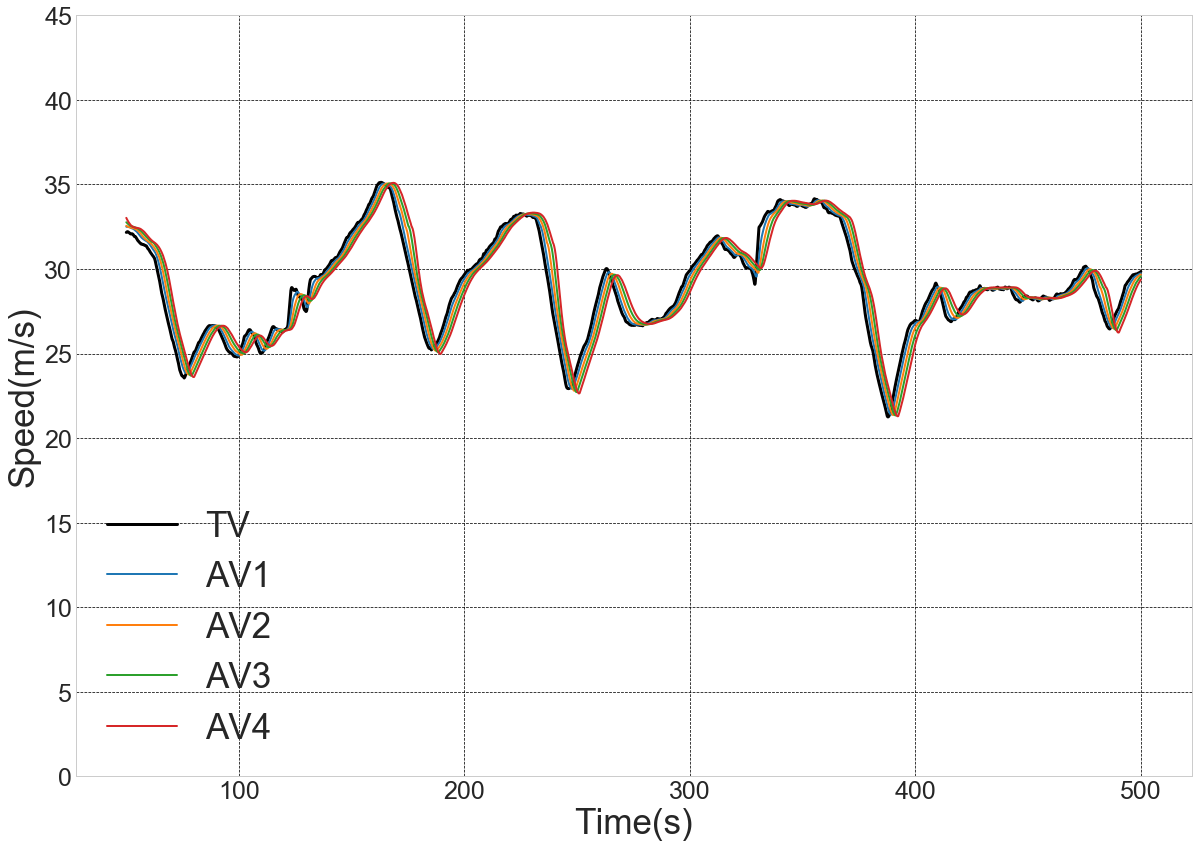

In [16]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(df1['timestep_time'][500:5000], df1['vehicle_speed'][500:5000],linewidth=3, color='black', label='TV')
plt.plot(df2['timestep_time'][500:5000], df2['vehicle_speed'][500:5000],linewidth=2, label='AV1')
plt.plot(df3['timestep_time'][500:5000], df3['vehicle_speed'][500:5000],linewidth=2, label='AV2')
plt.plot(df4['timestep_time'][500:5000], df4['vehicle_speed'][500:5000], linewidth=2,label='AV3')
plt.plot(df5['timestep_time'][500:5000], df5['vehicle_speed'][500:5000], linewidth=2,label='AV4')
#plt.title('Speed vs Time (ACC Model Simulation)', size=22)
plt.xlabel('Time(s)',size=35)
plt.ylabel('Speed(m/s)',size=35)
#plt.xlim(0,1600)
plt.ylim(0,45)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=3, prop={'size': 35})
#plt.savefig("Cali_SVTS.jpg", dpi=300)

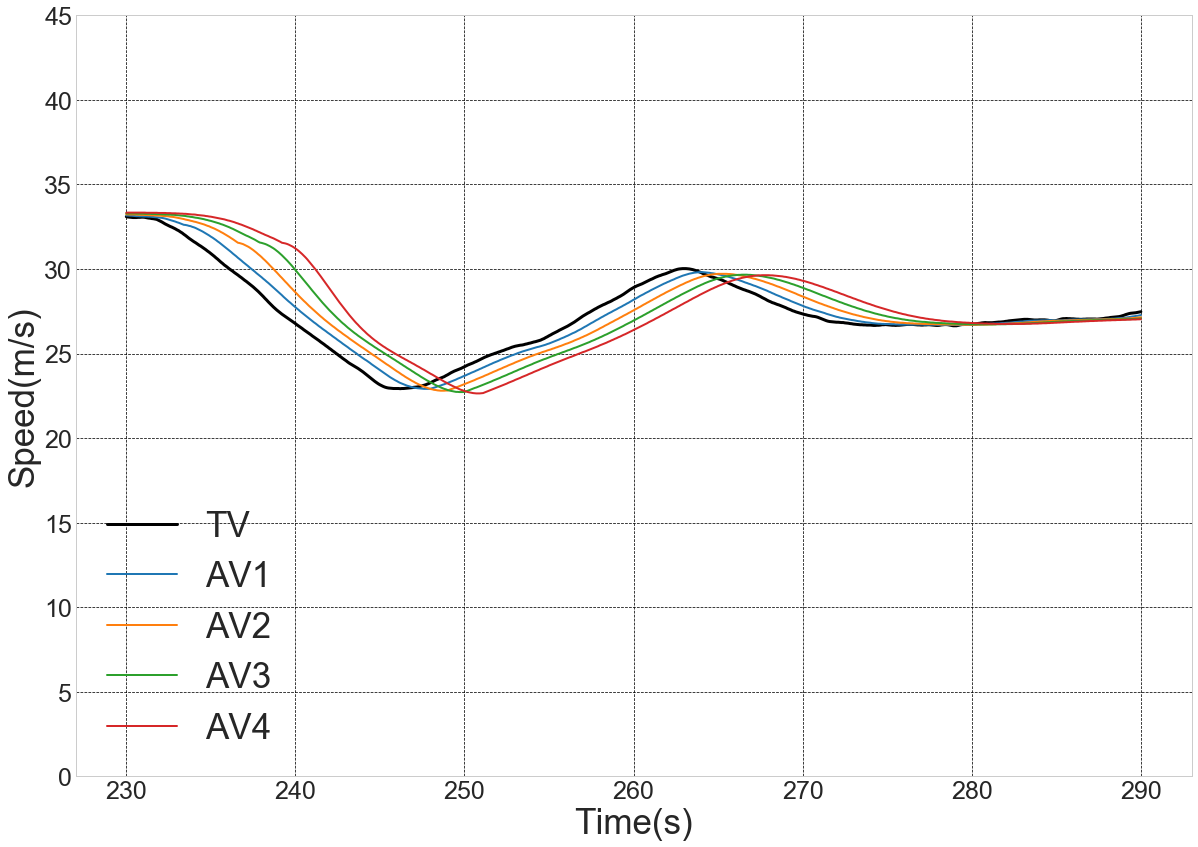

In [17]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(df1['timestep_time'][2300:2900], df1['vehicle_speed'][2300:2900],linewidth=3, color='black', label='TV')
plt.plot(df2['timestep_time'][2300:2900], df2['vehicle_speed'][2300:2900],linewidth=2, label='AV1')
plt.plot(df3['timestep_time'][2300:2900], df3['vehicle_speed'][2300:2900],linewidth=2, label='AV2')
plt.plot(df4['timestep_time'][2300:2900], df4['vehicle_speed'][2300:2900], linewidth=2, label='AV3')
plt.plot(df5['timestep_time'][2300:2900], df5['vehicle_speed'][2300:2900],linewidth=2, label='AV4')
#plt.title('Speed vs Time (ACC Model Simulation)',size=22)
plt.xlabel('Time(s)',size=35)
plt.ylabel('Speed(m/s)',size=35)
#plt.xlim(0,1600)
plt.ylim(0,45)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=3, prop={'size': 35})
#plt.savefig("Cali_SVTSM.jpg", dpi=300)

In [18]:
from scipy.stats import ks_2samp
ks_2samp(datar['Speed4'], df4['vehicle_speed'])

Ks_2sampResult(statistic=0.14637051192874442, pvalue=1.0)

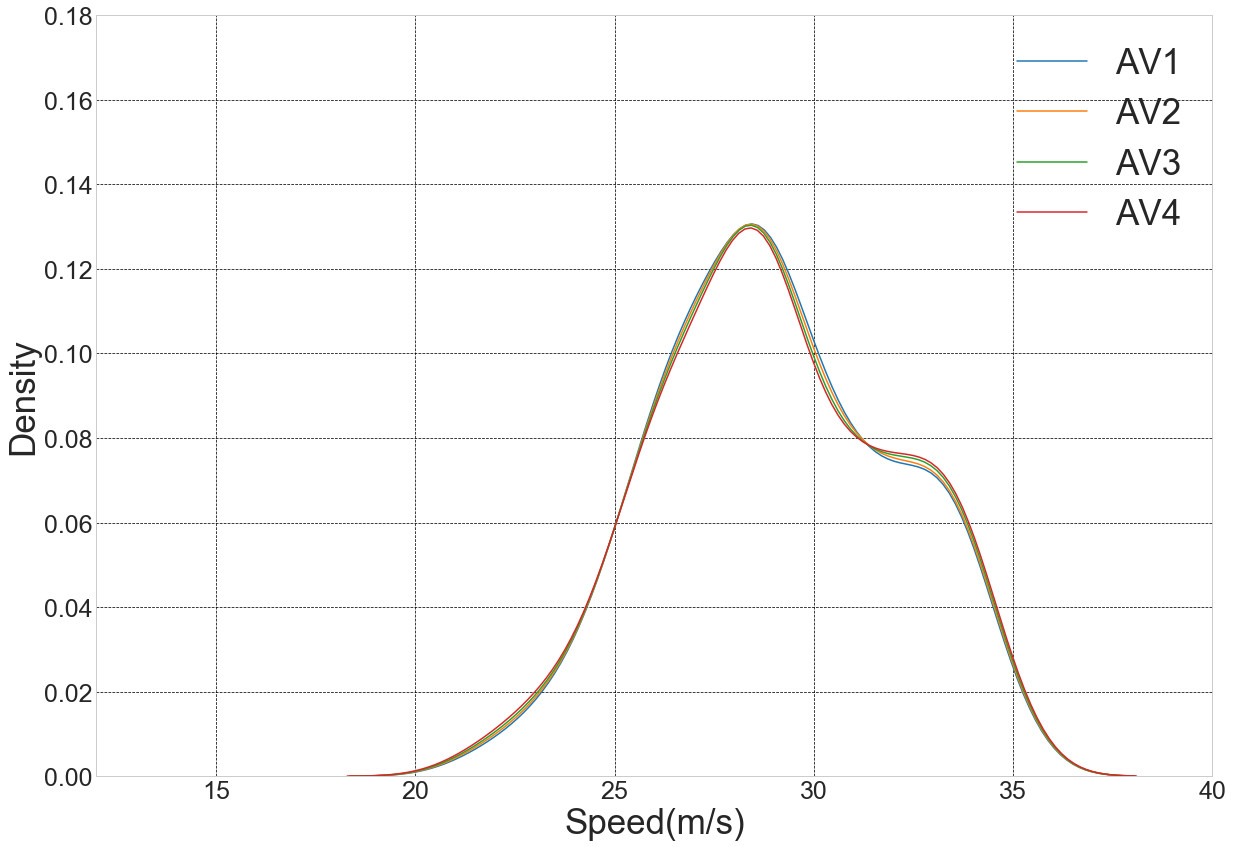

In [19]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
#sns.kdeplot( df1['vehicle_speed'][500:5000],color='black',bw=1,linewidth=3, label='TV')
sns.kdeplot( df2['vehicle_speed'][500:5000], bw=1,label='AV1')
sns.kdeplot(df3['vehicle_speed'][500:5000], bw=1,label='AV2')
sns.kdeplot(df4['vehicle_speed'][500:5000],bw=1, label='AV3')
sns.kdeplot(df5['vehicle_speed'][500:5000],bw=1, label='AV4')
#plt.title('KDE of Speed (ACC Model Simulation)',size=22)
plt.xlabel('Speed(m/s)',size=35)
plt.ylabel('Density',size=35)
plt.xlim(12,40)
plt.ylim(0,.18)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=1, prop={'size': 35})
#plt.savefig("Cali_KDES.jpg", dpi=300)

In [20]:
df5[500:5000]

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
500.0,50.0,89.97,AV4,e2_0,1591.00,0.0,33.02,AV4@AV4,-4.75,62.07,True
501.0,50.1,89.97,AV4,e2_0,1594.30,0.0,32.99,AV4@AV4,-4.41,62.07,True
502.0,50.2,89.97,AV4,e2_0,1597.59,0.0,32.97,AV4@AV4,-4.08,62.07,True
503.0,50.3,89.97,AV4,e2_0,1600.89,0.0,32.94,AV4@AV4,-3.74,62.07,True
504.0,50.4,89.97,AV4,e2_0,1604.18,0.0,32.91,AV4@AV4,-3.41,62.07,True
...,...,...,...,...,...,...,...,...,...,...,...
4996.0,499.6,89.97,AV4,e2_0,14645.27,0.0,29.29,AV4@AV4,1317.96,62.71,True
4997.0,499.7,89.97,AV4,e2_0,14648.20,0.0,29.31,AV4@AV4,1318.25,62.71,True
4998.0,499.8,89.97,AV4,e2_0,14651.14,0.0,29.33,AV4@AV4,1318.55,62.71,True


In [21]:
#timegap
tgap1=[0.0]*len(df5['timestep_time'][500:5000])
tgap2=[0.0]*len(df5['timestep_time'][500:5000])
tgap3=[0.0]*len(df5['timestep_time'][500:5000])
tgap4=[0.0]*len(df5['timestep_time'][500:5000])

j=0
for i in range(500,5000):
    tgap1[j]=(df1['vehicle_pos'][i]-df2['vehicle_pos'][i])/(df2['vehicle_speed'][i])
    tgap2[j]=(df2['vehicle_pos'][i]-df3['vehicle_pos'][i])/(df3['vehicle_speed'][i])
    tgap3[j]=(df3['vehicle_pos'][i]-df4['vehicle_pos'][i])/(df4['vehicle_speed'][i])
    tgap4[j]=(df4['vehicle_pos'][i]-df5['vehicle_pos'][i])/(df5['vehicle_speed'][i]) 
    j=j+1

tgap1=pd.DataFrame(tgap1)
tgap2=pd.DataFrame(tgap2)
tgap3=pd.DataFrame(tgap3)
tgap4=pd.DataFrame(tgap4)

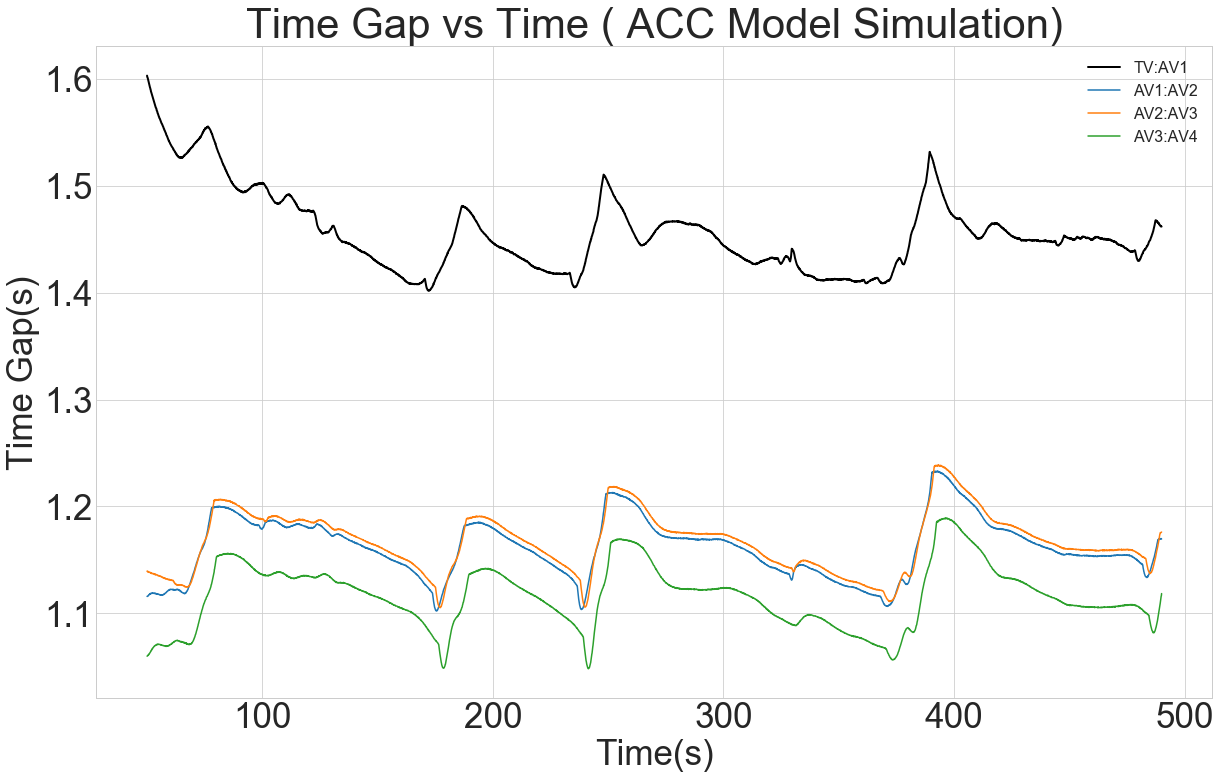

In [22]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df5['timestep_time'][500:4900], tgap1[0][0:4401],linewidth=2, color='black', label='TV:AV1')
plt.plot(df5['timestep_time'][500:4900], tgap2[0][0:4401],label='AV1:AV2')
plt.plot(df5['timestep_time'][500:4900], tgap3[0][0:4401],label='AV2:AV3')
plt.plot(df5['timestep_time'][500:4900], tgap4[0][0:4401],label='AV3:AV4')
plt.title('Time Gap vs Time ( ACC Model Simulation)')
plt.xlabel('Time(s)')
plt.ylabel('Time Gap(s)')
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.rcParams.update({'font.size': 16})
plt.legend(loc=1, prop={'size': 16})

In [23]:
tgap4[0][0:4833].describe()


count    4501.000000
mean        1.115868
std         0.033417
min         0.000000
25%         1.096610
50%         1.117814
75%         1.134586
max         1.189166
Name: 0, dtype: float64

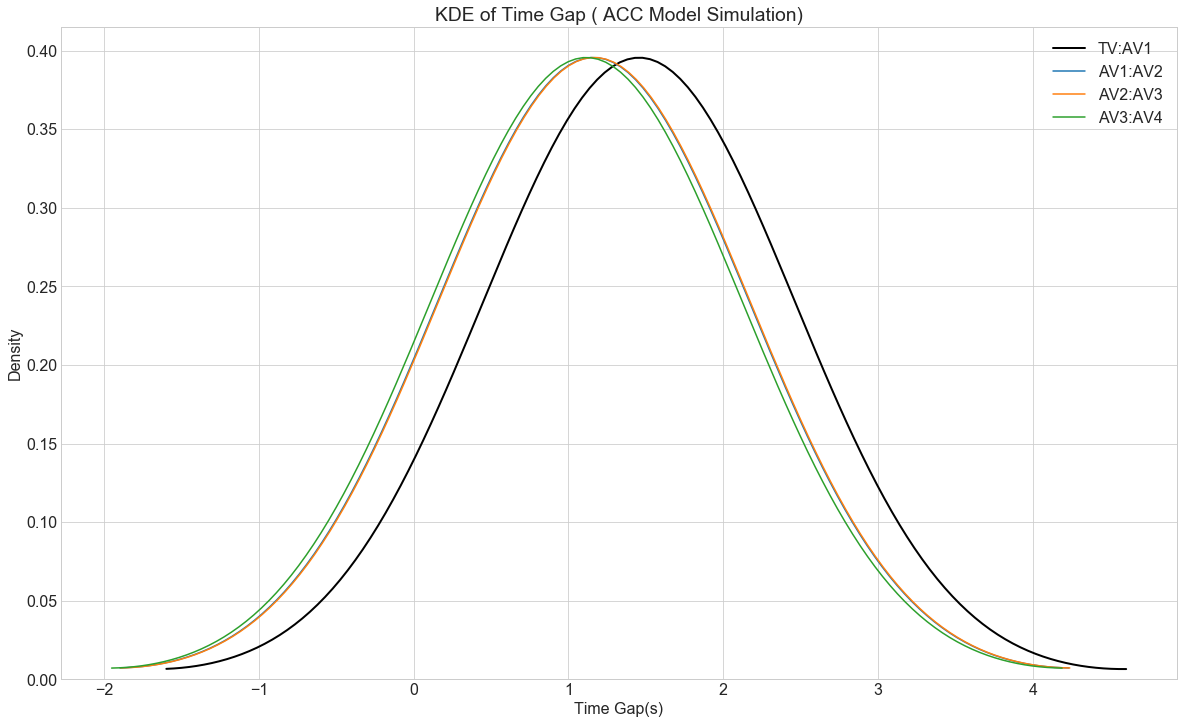

In [24]:
plt.rcParams["figure.figsize"] = (20,12)
sns.kdeplot(tgap1[0][0:4401], bw=1, color='black', linewidth=2, label='TV:AV1')
sns.kdeplot( tgap2[0][0:4401],bw=1, label='AV1:AV2')
sns.kdeplot( tgap3[0][0:4401],bw=1, label='AV2:AV3')
sns.kdeplot( tgap4[0][0:4401],bw=1, label='AV3:AV4')
plt.title('KDE of Time Gap ( ACC Model Simulation)')
plt.xlabel('Time Gap(s)')
plt.ylabel('Density')
#plt.xlim(0,1200)
#plt.ylim(0,5)
plt.rcParams.update({'font.size': 16})
plt.legend(loc=1, prop={'size': 16})

In [25]:
#accleration
ac1=[0.0]*len(df1['timestep_time'][500:5000])
ac2=[0.0]*len(df2['timestep_time'][500:5000])
ac3=[0.0]*len(df3['timestep_time'][500:5000])
ac4=[0.0]*len(df4['timestep_time'][500:5000])
ac5=[0.0]*len(df5['timestep_time'][500:5000])
j = 0
for i in range(500,5000):
    ac1[j]=((df1['vehicle_speed'][i+1]-df1['vehicle_speed'][i])/0.1)
    ac2[j]=((df2['vehicle_speed'][i+1]-df2['vehicle_speed'][i])/0.1)
    ac3[j]=((df3['vehicle_speed'][i+1]-df3['vehicle_speed'][i])/0.1)
    ac4[j]=((df4['vehicle_speed'][i+1]-df4['vehicle_speed'][i])/0.1)
    ac5[j]=((df5['vehicle_speed'][i+1]-df5['vehicle_speed'][i])/0.1)
    j = j + 1
ac1=pd.DataFrame(ac1)
ac2=pd.DataFrame(ac2)
ac3=pd.DataFrame(ac3)
ac4=pd.DataFrame(ac4)
ac5=pd.DataFrame(ac5)

ac4

In [26]:
ac4

,0
0,-0.1
1,-0.1
2,-0.2
3,-0.1
4,-0.2
...,...
4496,0.2
4497,0.1
4498,0.1
4499,0.2


In [27]:
#relative distance
rd1=[0.0]*len(df1['timestep_time'][500:5000])
rd2=[0.0]*len(df2['timestep_time'][500:5000])
rd3=[0.0]*len(df3['timestep_time'][500:5000])
rd4=[0.0]*len(df4['timestep_time'][500:5000])

j = 0
for i in range(500,5000):
    rd1[j]=(df1['vehicle_pos'][i]-df2['vehicle_pos'][i])
    rd2[j]=(df2['vehicle_pos'][i]-df3['vehicle_pos'][i])
    rd3[j]=(df3['vehicle_pos'][i]-df4['vehicle_pos'][i])
    rd4[j]=(df4['vehicle_pos'][i]-df5['vehicle_pos'][i]) 
    j = j + 1
rd1=pd.DataFrame(rd1)
rd2=pd.DataFrame(rd2)
rd3=pd.DataFrame(rd3)
rd4=pd.DataFrame(rd4)


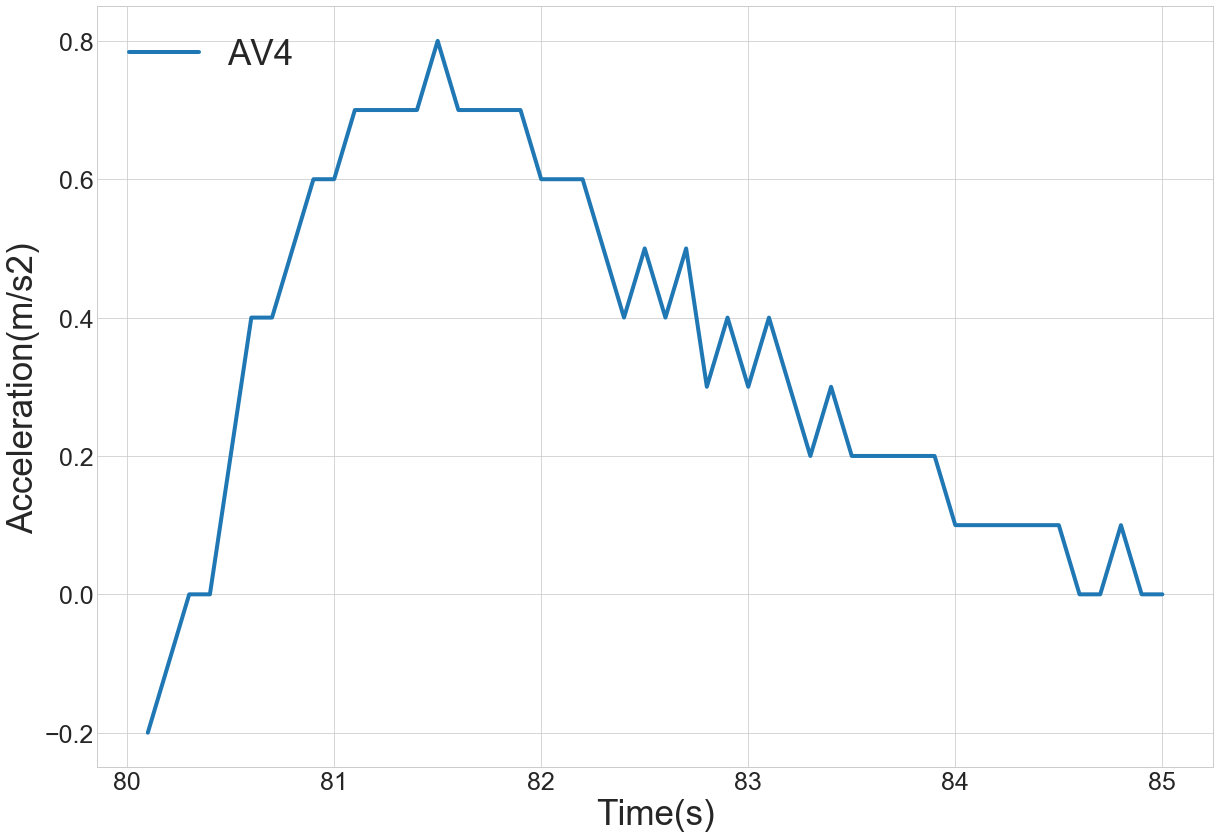

In [28]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(df1['timestep_time'][801:850], ac2[0][800:850],linewidth=4, label='AV4')
#plt.plot(df1['timestep_time'][801:850], ac3[0][800:850],linewidth=4, label='AV2')
#plt.plot(df1['timestep_time'][801:850], ac4[0][800:850], linewidth=4, label='AV3')
#plt.plot(df1['timestep_time'][801:850], ac5[0][800:850], linewidth=4,  label='AV4')
#plt.title('Acceleration vs Time of AVs (ACC Model Simulation)', size = 20)
plt.xlabel('Time(s)', size = 35)
plt.ylabel('Acceleration(m/s2)', size = 35)
plt.xticks(size = 25)
plt.yticks(size = 25)
#plt.ylim(-5,5)
plt.legend(loc=2, prop={'size': 35})
#plt.savefig("Cali_AV4acac.jpg", dpi=300)

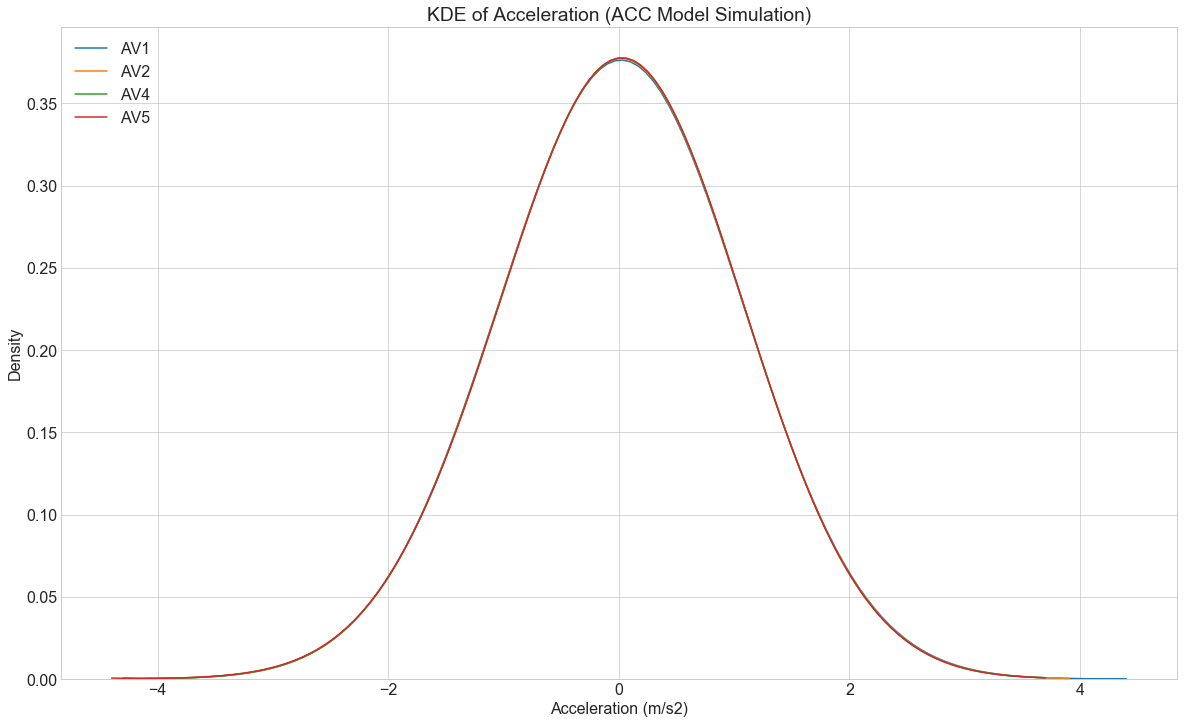

In [29]:
plt.rcParams["figure.figsize"] = (20,12)
#sns.kdeplot( df1['vehicle_speed'][500:5000],color='black',bw=1,linewidth=3, label='TV')
sns.kdeplot(ac2[0][500:5000], bw=1,label='AV1')
sns.kdeplot(ac3[0][500:5000], bw=1,label='AV2')
sns.kdeplot(ac4[0][500:5000],bw=1, label='AV4')
sns.kdeplot(ac5[0][500:5000],bw=1, label='AV5')
plt.title('KDE of Acceleration (ACC Model Simulation)')
plt.xlabel('Acceleration (m/s2)')
plt.ylabel('Density')
#plt.xlim(12,40)
#plt.ylim(0,.18)
plt.rcParams.update({'font.size': 16})
plt.legend(loc=2, prop={'size': 16})

In [30]:
from scipy import stats
sns.set(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd1[0],ac2[0])
print(slope, intercept, p_value, r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd2[0],ac3[0])
print(slope, intercept, p_value, r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd3[0],ac4[0])
print(slope, intercept, p_value, r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd4[0],ac5[0])
print(slope, intercept, p_value, r_value**2)

-0.0005295797963957694 0.016202240103241297 0.687888447859632 3.587370685530463e-05
0.012597120250768985 -0.43030340124483063 1.0352053820130912e-14 0.013211492466961749
0.012199968819656392 -0.41965997427526114 2.3603829926480275e-14 0.012855665372515243
0.015178885533683642 -0.4990153756866138 1.104388161919423e-19 0.018153257042917904


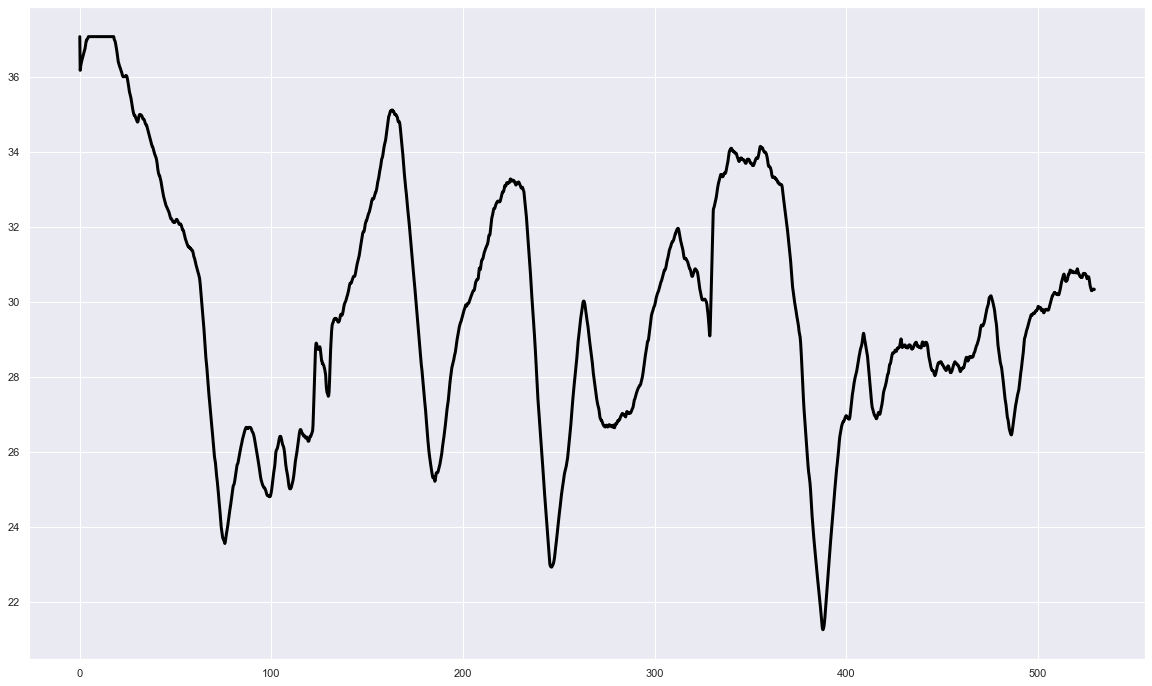

In [31]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df1['timestep_time'], df1['vehicle_speed'],linewidth=3, color='black', label='TV')

In [32]:
df1['vehicle_speed']

serial
0.0       37.08
1.0       36.63
2.0       36.18
3.0       36.21
4.0       36.26
          ...  
5291.0    30.34
5292.0    30.34
5293.0    30.34
5294.0    30.33
5295.0    30.33
Name: vehicle_speed, Length: 5296, dtype: float64

In [33]:
df5

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
48.0,4.8,89.87,AV4,e1_0,5.10,0.0,36.00,AV4,-182.88,61.95,True
49.0,4.9,89.87,AV4,e1_0,8.70,0.0,36.00,AV4@AV4,-179.30,61.96,True
50.0,5.0,89.87,AV4,e1_0,12.30,0.0,36.00,AV4@AV4,-175.72,61.97,True
51.0,5.1,89.87,AV4,e1_0,15.90,0.0,36.00,AV4@AV4,-172.15,61.98,True
52.0,5.2,89.87,AV4,e1_0,19.50,0.0,36.00,AV4@AV4,-168.57,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5337.0,533.7,90.03,AV4,e4_0,83.98,0.0,34.69,AV4@AV4,1528.54,62.67,True
5338.0,533.8,90.03,AV4,e4_0,87.49,0.0,35.09,AV4@AV4,1530.88,62.67,True
5339.0,533.9,90.03,AV4,e4_0,91.04,0.0,35.49,AV4@AV4,1533.25,62.66,True


In [34]:
print(pearsonr( rd1[0], ac2[0]))
print(pearsonr( rd2[0], ac3[0]))
print(pearsonr( rd3[0], ac4[0]))
print(pearsonr( rd4[0], ac5[0]))

(-0.005989466324749122, 0.6878884478646081)
(0.11494125659205992, 1.0352053820210281e-14)
(0.1133828266207685, 2.3603829926649283e-14)
(0.13473402333084955, 1.104388161927588e-19)


In [35]:
d1=[0.0]*len(df1['timestep_time'][500:5000])
d2=[0.0]*len(df2['timestep_time'][500:5000])
d3=[0.0]*len(df3['timestep_time'][500:5000])
d4=[0.0]*len(df4['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    d1[j]=abs(df2['vehicle_speed'][i]-datar['Speed2'][i])
    d2[j]=abs(df3['vehicle_speed'][i]-datar['Speed3'][i])
    d3[j]=abs(df4['vehicle_speed'][i]-datar['Speed4'][i])
    d4[j]=abs(df5['vehicle_speed'][i]-datar['Speed5'][i])
    j = j + 1
d1=pd.DataFrame(d1)
d2=pd.DataFrame(d2)
d3=pd.DataFrame(d3)
d4=pd.DataFrame(d4)

In [36]:
d4[0].sum(axis = 0, skipna = True)/math.sqrt(4501)

142.63304191776015

In [37]:
(d1[0].sum(axis = 0, skipna = True)+d2[0].sum(axis = 0, skipna = True)+d3[0].sum(axis = 0, skipna = True)+d4[0].sum(axis = 0, skipna = True))/(4501*4)

1.3846237435486557

In [38]:
tgap1=[0.0]*len(df1['timestep_time'][500:5000]) 
tgap2=[0.0]*len(df1['timestep_time'][500:5000])
tgap3=[0.0]*len(df1['timestep_time'][500:5000])
tgap4=[0.0]*len(df1['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    tgap1[j]=(rd1[0][j])/(df2['vehicle_speed'][i])
    tgap2[j]=(rd2[0][j])/(df3['vehicle_speed'][i])
    tgap3[j]=(rd3[0][j])/(df4['vehicle_speed'][i])
    tgap4[j]=(rd4[0][j])/(df5['vehicle_speed'][i]) 
    j=j+1
tgap1=pd.DataFrame(tgap1)
tgap2=pd.DataFrame(tgap2)
tgap3=pd.DataFrame(tgap3)
tgap4=pd.DataFrame(tgap4)

In [39]:
print(pearsonr( rd1[0], ac2[0]))
print(pearsonr( rd2[0], ac3[0]))
print(pearsonr( rd3[0], ac4[0]))
print(pearsonr( rd4[0], ac5[0]))

(-0.005989466324749122, 0.6878884478646081)
(0.11494125659205992, 1.0352053820210281e-14)
(0.1133828266207685, 2.3603829926649283e-14)
(0.13473402333084955, 1.104388161927588e-19)


In [40]:
ac2 = ac2.rename(columns={0:'ac2'})
ac3 = ac3.rename(columns={0:'ac3'})
ac4 = ac4.rename(columns={0:'ac4'})
ac5 = ac5.rename(columns={0:'ac5'})
rd1 = rd1.rename(columns={0:'rd1'})
rd2 = rd2.rename(columns={0:'rd2'})
rd3 = rd3.rename(columns={0:'rd3'})
rd4 = rd4.rename(columns={0:'rd4'})

In [41]:
df3

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
25.0,2.5,89.87,AV2,e1_0,5.10,0.0,36.00,AV2,-182.88,61.95,True
26.0,2.6,89.87,AV2,e1_0,8.70,0.0,36.00,AV2@AV2,-179.30,61.96,True
27.0,2.7,89.87,AV2,e1_0,12.30,0.0,36.00,AV2@AV2,-175.72,61.97,True
28.0,2.8,89.87,AV2,e1_0,15.90,0.0,36.00,AV2@AV2,-172.15,61.98,True
29.0,2.9,89.87,AV2,e1_0,19.50,0.0,36.00,AV2@AV2,-168.57,61.98,True
...,...,...,...,...,...,...,...,...,...,...,...
5315.0,531.5,90.03,AV2,e4_0,83.79,0.0,33.44,AV2@AV2,1528.41,62.67,True
5316.0,531.6,90.03,AV2,e4_0,87.15,0.0,33.62,AV2@AV2,1530.65,62.67,True
5317.0,531.7,90.03,AV2,e4_0,90.53,0.0,33.80,AV2@AV2,1532.91,62.66,True


In [42]:
rd1

,rd1
0,52.10
1,52.06
2,52.03
3,52.01
4,51.98
...,...
4496,42.86
4497,42.87
4498,42.87
4499,42.88


In [43]:
df2r=pd.concat([ac2, rd1], axis=1).reindex(ac2.index)
df3r=pd.concat([ac3, rd2], axis=1).reindex(ac3.index)
df4r=pd.concat([ac4, rd3], axis=1).reindex(ac4.index)
df5r=pd.concat([ac5, rd4], axis=1).reindex(ac4.index)

In [44]:
df2r

,ac2,rd1
0,0.0,52.10
1,-0.1,52.06
2,0.0,52.03
3,0.0,52.01
4,0.0,51.98
...,...,...
4496,0.1,42.86
4497,0.1,42.87
4498,0.0,42.87
4499,0.1,42.88


In [45]:
df5r['AC5'] = (df5r['ac5'] >= 0) 
dfn, dfp = [x for _, x in df5r.groupby(df5r['AC5'] == True)]
dfn

,ac5,rd4,AC5
0,-0.3,35.00,False
1,-0.2,34.97,False
2,-0.3,34.96,False
3,-0.3,34.93,False
4,-0.2,34.91,False
...,...,...,...
4394,-0.3,29.21,False
4395,-0.2,29.22,False
4396,-0.1,29.24,False
4397,-0.2,29.26,False


In [46]:
print(pearsonr(dfp['rd4'], dfp['ac5']))

(-0.2519550952407732, 4.63912375154292e-43)


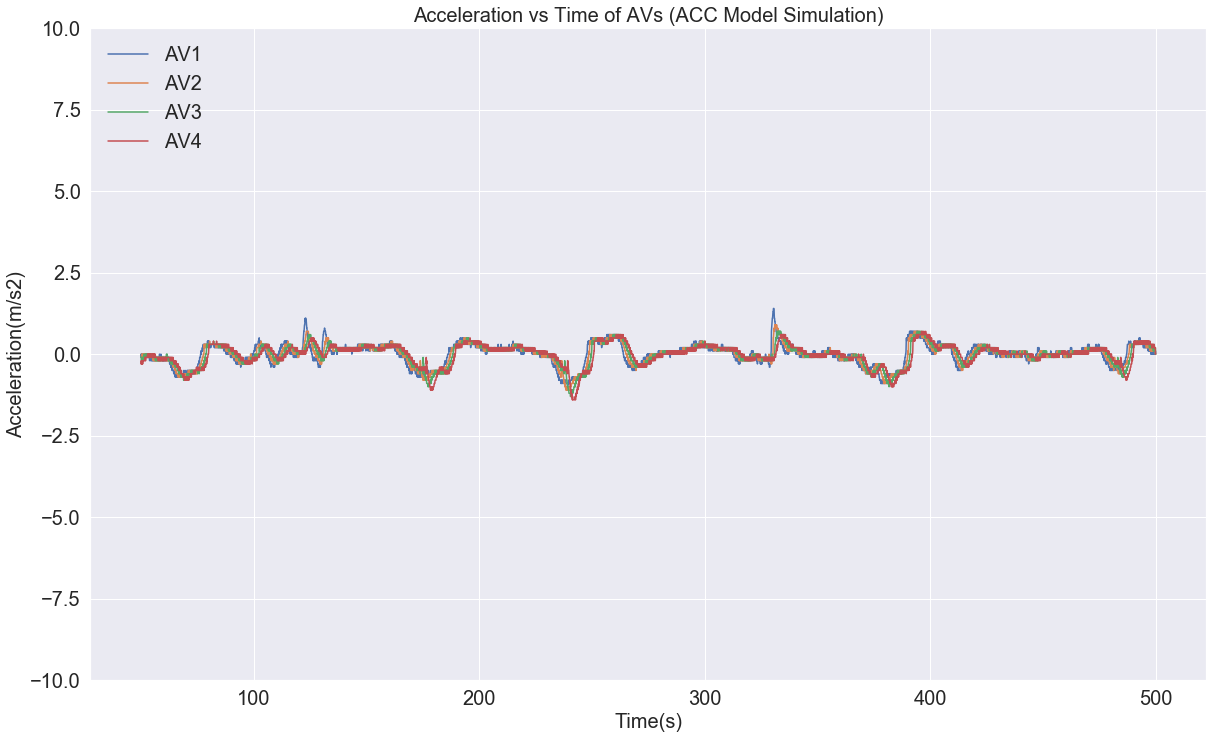

In [47]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df1['timestep_time'][500:5000], ac2['ac2'], label='AV1')
plt.plot(df1['timestep_time'][500:5000], ac3['ac3'], label='AV2')
plt.plot(df1['timestep_time'][500:5000], ac4['ac4'], label='AV3')
plt.plot(df1['timestep_time'][500:5000], ac5['ac5'],label='AV4')
plt.title('Acceleration vs Time of AVs (ACC Model Simulation)', size = 20)
plt.xlabel('Time(s)', size = 20)
plt.ylabel('Acceleration(m/s2)', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylim(-10,10)
plt.legend(loc=2, prop={'size': 20})

In [48]:
TV1r=[0.0]*len(datar) 
AV2r=[0.0]*len(datar)
AV3r=[0.0]*len(datar)
AV4r=[0.0]*len(datar)
AV5r=[0.0]*len(datar)
for i in range(datar.shape[0] - 1):
    TV1r[i+1]=mt.sqrt((datar['E1'][i]-datar['E1'][i+1])**2+(datar['N1'][i]-datar['N1'][i+1])**2)+TV1r[i]
    AV2r[i+1]=mt.sqrt((datar['E2'][i]-datar['E2'][i+1])**2+(datar['N2'][i]-datar['N2'][i+1])**2)+AV2r[i]
    AV3r[i+1]=mt.sqrt((datar['E3'][i]-datar['E3'][i+1])**2+(datar['N3'][i]-datar['N3'][i+1])**2)+AV3r[i]
    AV4r[i+1]=mt.sqrt((datar['E4'][i]-datar['E4'][i+1])**2+(datar['N4'][i]-datar['N4'][i+1])**2)+AV4r[i]
    AV5r[i+1]=mt.sqrt((datar['E5'][i]-datar['E5'][i+1])**2+(datar['N5'][i]-datar['N5'][i+1])**2)+AV5r[i]
TV1r=pd.DataFrame(TV1r)
AV2r=pd.DataFrame(AV2r)
AV3r=pd.DataFrame(AV3r)
AV4r=pd.DataFrame(AV4r)
AV5r=pd.DataFrame(AV5r)
TV1r = TV1r.rename(columns={0:'TV1r'})
AV2r = AV2r.rename(columns={0:'AV2r'})
AV3r = AV3r.rename(columns={0:'AV3r'})
AV4r = AV4r.rename(columns={0:'AV4r'})
AV5r = AV5r.rename(columns={0:'AV5r'})

In [49]:
datai=pd.read_csv('D:\CE 705 TRB\Sumo\IDM.csv')

In [50]:
datai['serial']=datai['timestep_time']*10
datai=datai.set_index('serial')
datai

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
serial,,,,,,,,,,
0.0,0.0,89.87,TV,e1_0,5.10,0.0,0.00,TV,-182.88,61.95
1.0,0.1,89.87,TV,e1_0,5.12,0.0,0.20,TV@TV,-182.86,61.95
2.0,0.2,89.87,TV,e1_0,5.16,0.0,0.40,TV@TV,-182.82,61.95
3.0,0.3,89.87,TV,e1_0,5.22,0.0,0.60,TV@TV,-182.76,61.95
4.0,0.4,89.87,TV,e1_0,5.30,0.0,0.80,TV@TV,-182.68,61.95
...,...,...,...,...,...,...,...,...,...,...
5456.0,545.6,90.03,AV4,e4_0,87.63,0.0,32.38,AV4@AV4,1530.97,62.66
5457.0,545.7,90.03,AV4,e4_0,90.88,0.0,32.52,AV4@AV4,1533.14,62.66
5458.0,545.8,90.03,AV4,e4_0,94.14,0.0,32.65,AV4@AV4,1535.32,62.66


In [51]:
dfi=datai.groupby('vehicle_id')

In [52]:
datai['v_id'] = (datai['vehicle_id'].str[0:3]=='TV') 
df0i, df1i = [x for _, x in datai.groupby(datai['v_id'] == True)]
df1i

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
0.0,0.0,89.87,TV,e1_0,5.10,0.0,0.00,TV,-182.88,61.95,True
1.0,0.1,89.87,TV,e1_0,5.12,0.0,0.20,TV@TV,-182.86,61.95,True
2.0,0.2,89.87,TV,e1_0,5.16,0.0,0.40,TV@TV,-182.82,61.95,True
3.0,0.3,89.87,TV,e1_0,5.22,0.0,0.60,TV@TV,-182.76,61.95,True
4.0,0.4,89.87,TV,e1_0,5.30,0.0,0.80,TV@TV,-182.68,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5401.0,540.1,90.03,TV,e4_0,86.38,0.0,31.60,TV@TV,1530.14,62.67,True
5402.0,540.2,90.03,TV,e4_0,89.54,0.0,31.60,TV@TV,1532.25,62.66,True
5403.0,540.3,90.03,TV,e4_0,92.70,0.0,31.61,TV@TV,1534.36,62.66,True


In [53]:
datai['v_id'] = (datai['vehicle_id'].str[0:3]=='AV1')
df0i, df2i = [x for _, x in datai.groupby(datai['v_id'] == True)]
df2i

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
26.0,2.6,89.87,AV1,e1_0,5.10,0.0,0.00,AV1,-182.88,61.95,True
27.0,2.7,89.87,AV1,e1_0,5.10,0.0,0.01,AV1@AV1,-182.87,61.95,True
28.0,2.8,89.87,AV1,e1_0,5.13,0.0,0.25,AV1@AV1,-182.85,61.95,True
29.0,2.9,89.87,AV1,e1_0,5.18,0.0,0.59,AV1@AV1,-182.79,61.95,True
30.0,3.0,89.87,AV1,e1_0,5.28,0.0,0.98,AV1@AV1,-182.69,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5417.0,541.7,90.03,AV1,e4_0,83.99,0.0,33.54,AV1@AV1,1528.55,62.67,True
5418.0,541.8,90.03,AV1,e4_0,87.36,0.0,33.69,AV1@AV1,1530.79,62.67,True
5419.0,541.9,90.03,AV1,e4_0,90.74,0.0,33.84,AV1@AV1,1533.05,62.66,True


In [54]:
datai['v_id'] = (datai['vehicle_id'].str[0:3]=='AV2')
df0i, df3i = [x for _, x in datai.groupby(datai['v_id'] == True)]
df3i

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
46.0,4.6,89.87,AV2,e1_0,5.10,0.0,0.00,AV2,-182.88,61.95,True
47.0,4.7,89.87,AV2,e1_0,5.10,0.0,0.05,AV2@AV2,-182.87,61.95,True
48.0,4.8,89.87,AV2,e1_0,5.12,0.0,0.15,AV2@AV2,-182.86,61.95,True
49.0,4.9,89.87,AV2,e1_0,5.15,0.0,0.28,AV2@AV2,-182.83,61.95,True
50.0,5.0,89.87,AV2,e1_0,5.19,0.0,0.43,AV2@AV2,-182.79,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5432.0,543.2,90.03,AV2,e4_0,84.33,0.0,32.23,AV2@AV2,1528.77,62.67,True
5433.0,543.3,90.03,AV2,e4_0,87.56,0.0,32.29,AV2@AV2,1530.93,62.66,True
5434.0,543.4,90.03,AV2,e4_0,90.79,0.0,32.36,AV2@AV2,1533.09,62.66,True


In [55]:
datai['v_id'] = (datai['vehicle_id'].str[0:3]=='AV3')
df0i, df4i = [x for _, x in datai.groupby(datai['v_id'] == True)]
df4i

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
76.0,7.6,89.87,AV3,e1_0,5.10,0.0,0.00,AV3,-182.88,61.95,True
77.0,7.7,89.87,AV3,e1_0,5.10,0.0,0.03,AV3@AV3,-182.87,61.95,True
78.0,7.8,89.87,AV3,e1_0,5.11,0.0,0.10,AV3@AV3,-182.86,61.95,True
79.0,7.9,89.87,AV3,e1_0,5.13,0.0,0.18,AV3@AV3,-182.84,61.95,True
80.0,8.0,89.87,AV3,e1_0,5.16,0.0,0.28,AV3@AV3,-182.82,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5444.0,544.4,90.03,AV3,e4_0,84.81,0.0,31.66,AV3@AV3,1529.09,62.67,True
5445.0,544.5,90.03,AV3,e4_0,87.98,0.0,31.72,AV3@AV3,1531.21,62.66,True
5446.0,544.6,90.03,AV3,e4_0,91.16,0.0,31.77,AV3@AV3,1533.33,62.66,True


In [56]:
datai['v_id'] = (datai['vehicle_id'].str[0:3]=='AV4')
df0i, df5i = [x for _, x in datai.groupby(datai['v_id'] == True)]
df5i

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
111.0,11.1,89.87,AV4,e1_0,5.10,0.0,0.00,AV4,-182.88,61.95,True
112.0,11.2,89.87,AV4,e1_0,5.11,0.0,0.12,AV4@AV4,-182.86,61.95,True
113.0,11.3,89.87,AV4,e1_0,5.14,0.0,0.31,AV4@AV4,-182.83,61.95,True
114.0,11.4,89.87,AV4,e1_0,5.20,0.0,0.56,AV4@AV4,-182.78,61.95,True
115.0,11.5,89.87,AV4,e1_0,5.28,0.0,0.84,AV4@AV4,-182.69,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5455.0,545.5,90.03,AV4,e4_0,84.39,0.0,32.23,AV4@AV4,1528.81,62.67,True
5456.0,545.6,90.03,AV4,e4_0,87.63,0.0,32.38,AV4@AV4,1530.97,62.66,True
5457.0,545.7,90.03,AV4,e4_0,90.88,0.0,32.52,AV4@AV4,1533.14,62.66,True


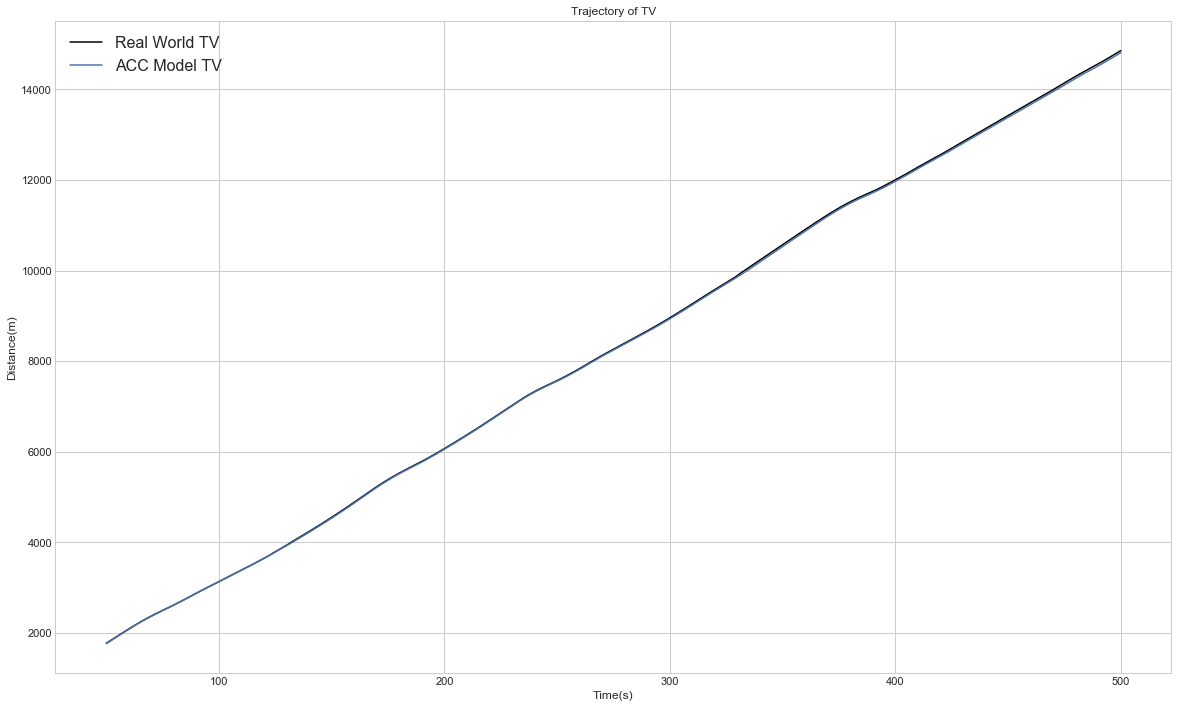

In [86]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(datar['Time'][500:5000], TV1r['TV1r'][500:5000], color='black', label='Real World TV')
plt.plot(df1['timestep_time'][500:5000], df1i['vehicle_pos'][500:5000]+350, label='ACC Model TV')
#plt.plot(df1i['timestep_time'][4750:5000], df1i['vehicle_pos'][4750:5000]+361, label='IDM Model TV')
#plt.plot(df3['timestep_time'][500:5000], df3['vehicle_speed'][500:5000], label='AV2')
#plt.plot(df4['timestep_time'][500:5000], df4['vehicle_speed'][500:5000], label='AV4')
#plt.plot(df5['timestep_time'][500:5000], df5['vehicle_speed'][500:5000], label='AV5')
plt.title('Trajectory of TV')
plt.xlabel('Time(s)')
plt.ylabel('Distance(m)')
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.rcParams.update({'font.size': 16})
plt.legend(loc=2, prop={'size': 16})

In [95]:
stats.ttest_ind(AV5r['AV5r'][500:5000], df5i['vehicle_pos'][500:5000]+350)

Ttest_indResult(statistic=2.954302840979452, pvalue=0.003141876760699819)

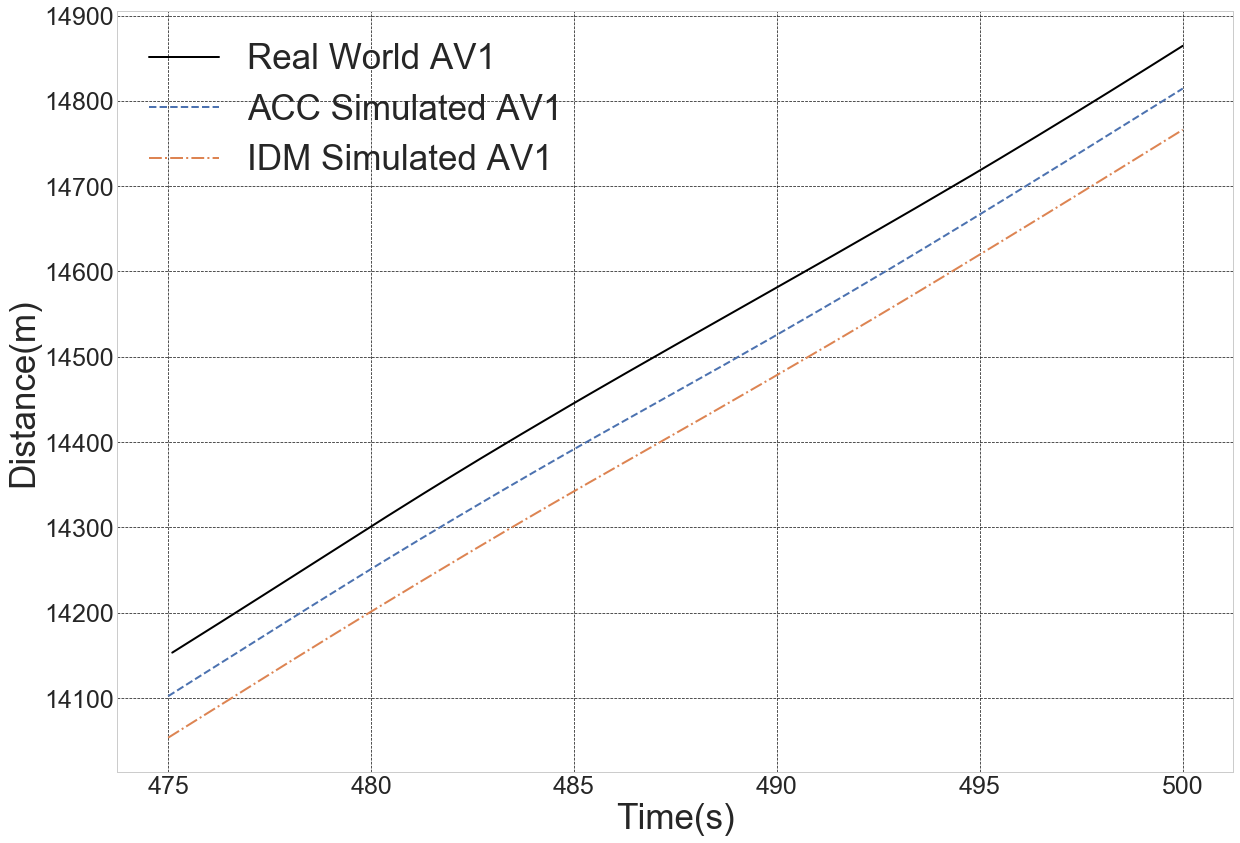

In [99]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(datar['Time'][4750:5000], AV2r['AV2r'][4750:5000], color='black',linewidth=2, label='Real World AV1')
plt.plot(df2['timestep_time'][4750:5000], df2['vehicle_pos'][4750:5000]+55,linewidth=2,linestyle='--', label='ACC Simulated AV1')
plt.plot(df2i['timestep_time'][4750:5000], df2i['vehicle_pos'][4750:5000]+350,linewidth=2,linestyle='-.', label='IDM Simulated AV1')
#plt.title('Trajectory of AV1',size=20 )
plt.xlabel('Time(s)', size=35)
plt.ylabel('Distance(m)', size=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=2, prop={'size': 35})
plt.savefig("Cali_AV1tr.jpg", dpi=300)

In [60]:
dAV1=[0.0]*len(df1['timestep_time'][500:5000])
dAV1i=[0.0]*len(df1['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    dAV1[j]=abs(AV2r['AV2r'][i]-df2['vehicle_pos'][i]+39)
    dAV1i[j]=abs(AV2r['AV2r'][i]-df2i['vehicle_pos'][i]+361)
    j=j+1
dAV1=pd.DataFrame(dAV1)
dAV1i=pd.DataFrame(dAV1i)

print(dAV1.sum()/4500)
print(dAV1i.sum()/4500)


0    126.740599
dtype: float64
0    795.669365
dtype: float64


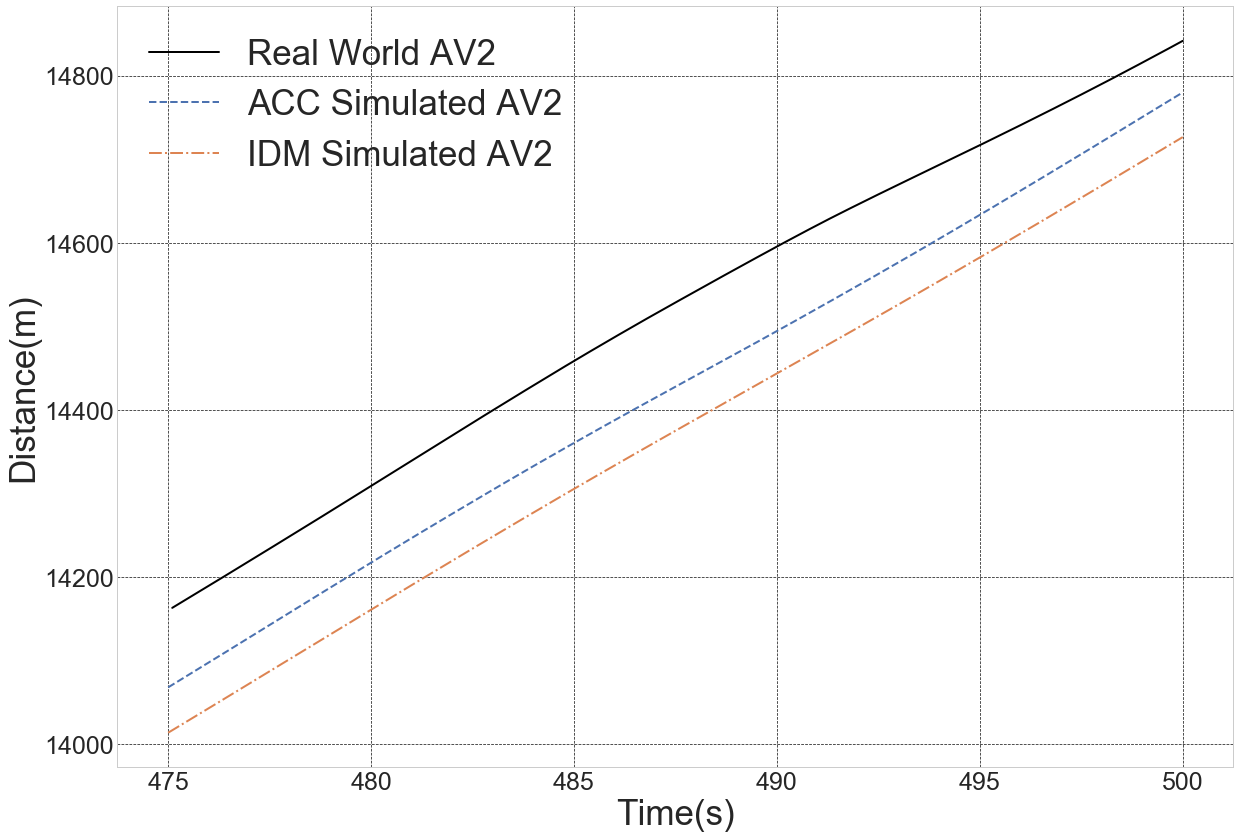

In [100]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,14)
plt.plot(datar['Time'][4750:5000], AV3r['AV3r'][4750:5000], color='black',linewidth=2, label='Real World AV2')
plt.plot(df3['timestep_time'][4750:5000], df3['vehicle_pos'][4750:5000]+55,linewidth=2,linestyle='--', label='ACC Simulated AV2')
plt.plot(df3i['timestep_time'][4750:5000], df3i['vehicle_pos'][4750:5000]+350,linewidth=2, linestyle='-.', label='IDM Simulated AV2')
#plt.title('Trajectory of AV2', size=20)
plt.xlabel('Time(s)', size=35)
plt.ylabel('Distance(m)', size=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=2, prop={'size': 35})
plt.savefig("Cali_AV2tr.jpg", dpi=300)

In [62]:
dAV2=[0.0]*len(df1['timestep_time'][500:5000])
dAV2i=[0.0]*len(df1['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    dAV2[j]=abs(AV3r['AV3r'][i]-df3['vehicle_pos'][i]+39)
    dAV2i[j]=abs(AV3r['AV3r'][i]-df3i['vehicle_pos'][i]+361)
    j=j+1
dAV2=pd.DataFrame(dAV2)
dAV2i=pd.DataFrame(dAV2i)

print(dAV2.sum()/4500)
print(dAV2i.sum()/4500)

0    167.916806
dtype: float64
0    848.097618
dtype: float64


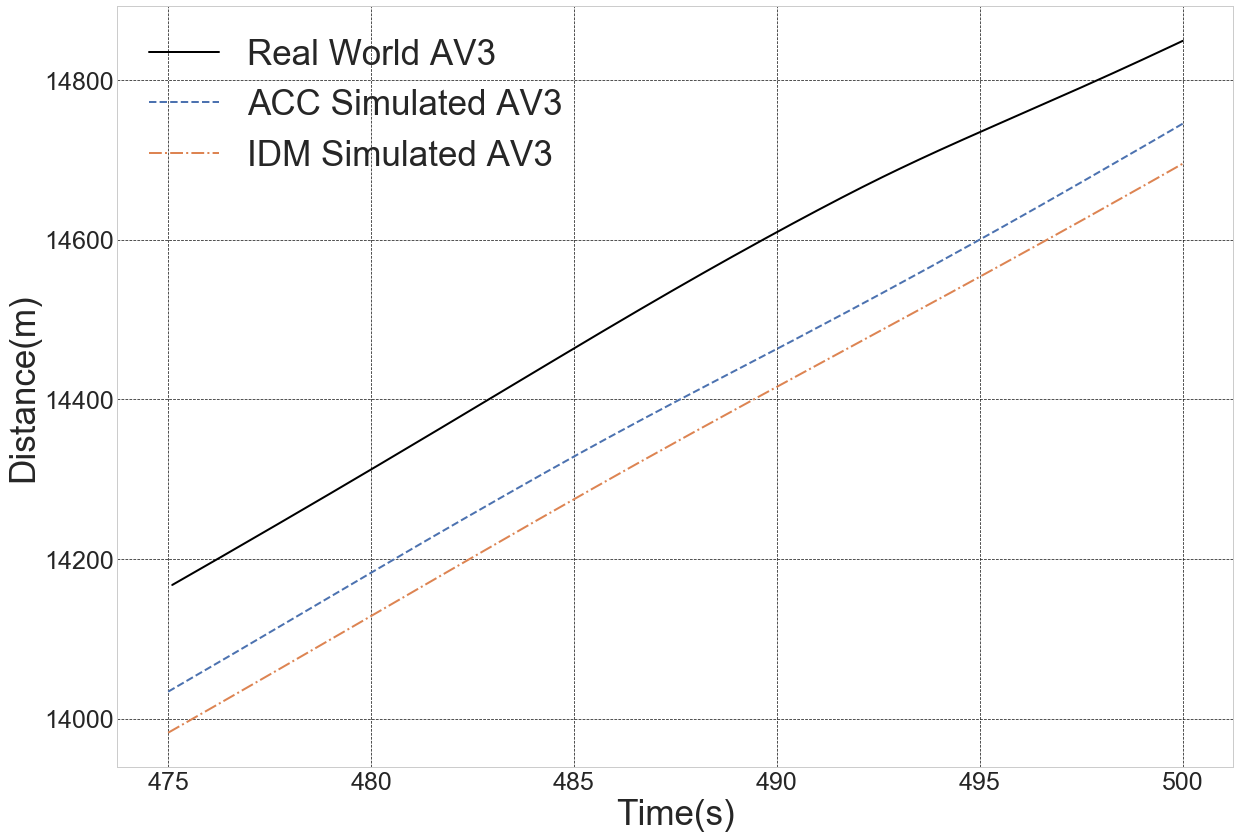

In [101]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(datar['Time'][4750:5000], AV4r['AV4r'][4750:5000], color='black', linewidth=2,label='Real World AV3')
plt.plot(df4['timestep_time'][4750:5000], df4['vehicle_pos'][4750:5000]+55,linewidth=2,linestyle='--', label='ACC Simulated AV3')
plt.plot(df4i['timestep_time'][4750:5000], df4i['vehicle_pos'][4750:5000]+350, linewidth=2,linestyle='-.',label='IDM Simulated AV3')
#plt.title('Trajectory of AV3', size=35)
plt.xlabel('Time(s)', size=35)
plt.ylabel('Distance(m)', size=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=2, prop={'size': 35})
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.savefig("Cli_AV3tr.jpg", dpi=300)

In [64]:
dAV3=[0.0]*len(df1['timestep_time'][500:5000])
dAV3i=[0.0]*len(df1['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    dAV3[j]=abs(AV4r['AV4r'][i]-df4['vehicle_pos'][i]+39)
    dAV3i[j]=abs(AV4r['AV4r'][i]-df4i['vehicle_pos'][i]+361)
    j=j+1
dAV3=pd.DataFrame(dAV3)
dAV3i=pd.DataFrame(dAV3i)

print(dAV3.sum()/4500)
print(dAV3i.sum()/4500)

0    208.887241
dtype: float64
0    901.607737
dtype: float64


In [65]:
dAV3.describe()

,0
count,4501.000000
mean,208.840832
std,18.376778
min,0.000000
25%,197.323798
50%,208.097632
75%,222.900068
max,250.053202


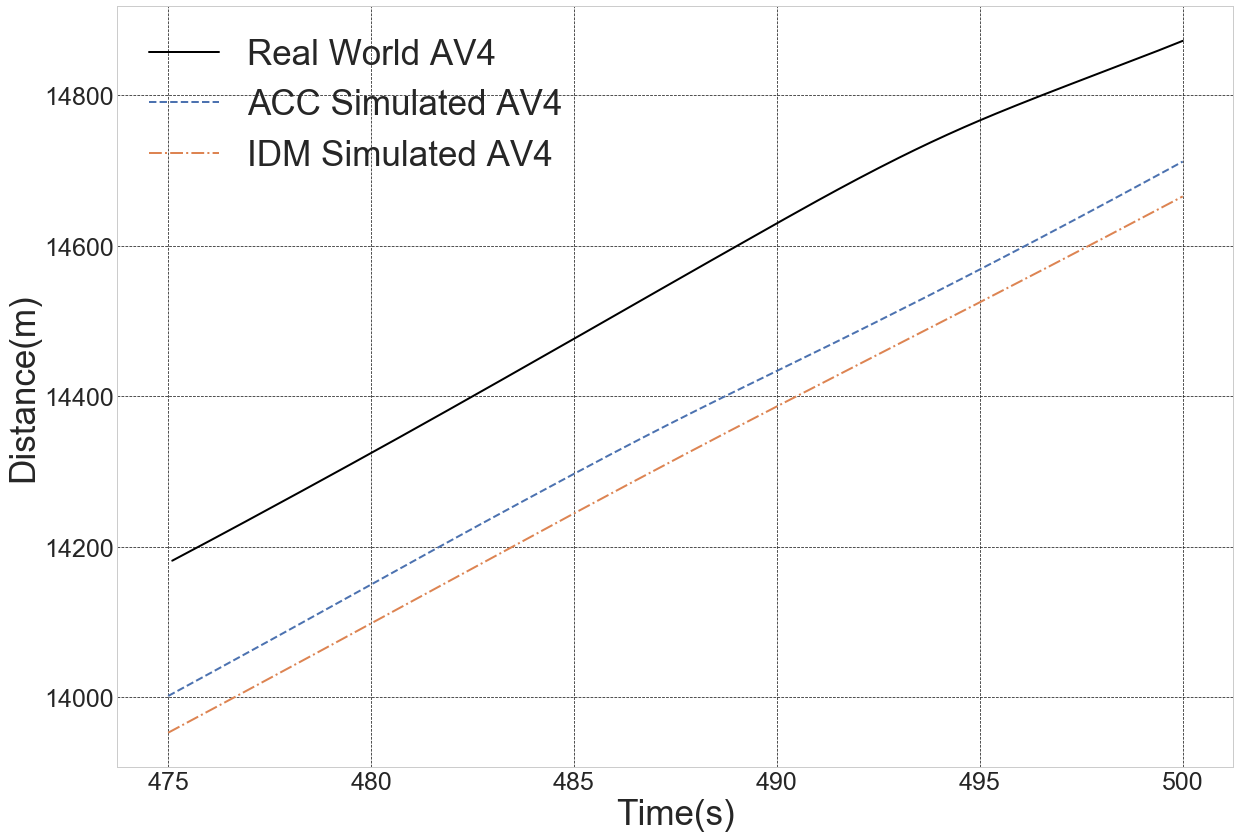

In [102]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(datar['Time'][4750:5000], AV5r['AV5r'][4750:5000], color='black',linewidth=2, label='Real World AV4')
plt.plot(df5['timestep_time'][4750:5000], df5['vehicle_pos'][4750:5000]+55,linewidth=2,linestyle='--', label='ACC Simulated AV4')
plt.plot(df5i['timestep_time'][4750:5000], df5i['vehicle_pos'][4750:5000]+350,linewidth=2,linestyle='-.', label='IDM Simulated AV4')
#plt.title('Trajectory of AV4',size=35)
plt.xlabel('Time(s)', size=35)
plt.ylabel('Distance(m)', size=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=2, prop={'size': 35})
plt.savefig("Cali_AV4tr.jpg", dpi=300)

In [67]:
dAV4=[0.0]*len(df1['timestep_time'][500:5000])
dAV4i=[0.0]*len(df1['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    dAV4[j]=abs(AV5r['AV5r'][i]-df5['vehicle_pos'][i]+39)
    dAV4i[j]=abs(AV5r['AV5r'][i]-df5i['vehicle_pos'][i]+361)
    j=j+1
dAV4=pd.DataFrame(dAV4)
dAV4i=pd.DataFrame(dAV4i)

print(dAV4.sum()/4500)
print(dAV4i.sum()/4500)

0    255.332961
dtype: float64
0    951.12715
dtype: float64


In [105]:
stats.ttest_ind(AV3r['AV3r'][500:5000], df3['vehicle_pos'][500:5000]+55)

Ttest_indResult(statistic=0.9012106711540948, pvalue=0.3675004361671048)

In [106]:
stats.ttest_ind(AV2r['AV2r'][500:5000], df2i['vehicle_pos'][500:5000]+350)

Ttest_indResult(statistic=1.0348603389243654, pvalue=0.30076194716626176)

In [70]:
print(stats.ks_2samp(datar['Speed5'][500:5000], df5i['vehicle_speed'][500:5000]))

Ks_2sampResult(statistic=0.18023155348194228, pvalue=1.0)


In [71]:
ac1i=[0.0]*len(df1i['timestep_time'][500:5000])
ac2i=[0.0]*len(df2i['timestep_time'][500:5000])
ac3i=[0.0]*len(df3i['timestep_time'][500:5000])
ac4i=[0.0]*len(df4i['timestep_time'][500:5000])
ac5i=[0.0]*len(df5i['timestep_time'][500:5000])
j = 0
for i in range(500,5000):
    ac1i[j]=((df1i['vehicle_speed'][i+1]-df1i['vehicle_speed'][i])/0.1)
    ac2i[j]=((df2i['vehicle_speed'][i+1]-df2i['vehicle_speed'][i])/0.1)
    ac3i[j]=((df3i['vehicle_speed'][i+1]-df3i['vehicle_speed'][i])/0.1)
    ac4i[j]=((df4i['vehicle_speed'][i+1]-df4i['vehicle_speed'][i])/0.1)
    ac5i[j]=((df5i['vehicle_speed'][i+1]-df5i['vehicle_speed'][i])/0.1)
    j = j + 1
ac1i=pd.DataFrame(ac1i)
ac2i=pd.DataFrame(ac2i)
ac3i=pd.DataFrame(ac3i)
ac4i=pd.DataFrame(ac4i)
ac5i=pd.DataFrame(ac5i)

In [72]:
ac1r=[0.0]*len(datar) 
ac2r=[0.0]*len(datar)
ac3r=[0.0]*len(datar)
ac4r=[0.0]*len(datar)
ac5r=[0.0]*len(datar)
for i in range(datar.shape[0] - 1):
    ac1r[i+1]=(datar['Speed1'][i+1]-datar['Speed1'][i])/0.1
    ac2r[i+1]=(datar['Speed2'][i+1]-datar['Speed2'][i])/0.1
    ac3r[i+1]=(datar['Speed3'][i+1]-datar['Speed3'][i])/0.1
    ac4r[i+1]=(datar['Speed4'][i+1]-datar['Speed4'][i])/0.1
    ac5r[i+1]=(datar['Speed5'][i+1]-datar['Speed5'][i])/0.1
ac1r=pd.DataFrame(ac1r)
ac2r=pd.DataFrame(ac2r)
ac3r=pd.DataFrame(ac3r)
ac4r=pd.DataFrame(ac4r)
ac5r=pd.DataFrame(ac5r)

In [73]:
ac2i.describe()

,0
count,4501.000000
mean,-0.007332
std,0.279896
min,-0.900000
25%,-0.100000
50%,0.000000
75%,0.200000
max,1.100000


In [74]:
ac4r[0]

0       0.000000
1       0.132329
2       0.137189
3       0.145228
4       0.155829
          ...   
7057    0.077865
7058    0.096178
7059    0.112839
7060    0.126220
7061    0.136256
Name: 0, Length: 7062, dtype: float64

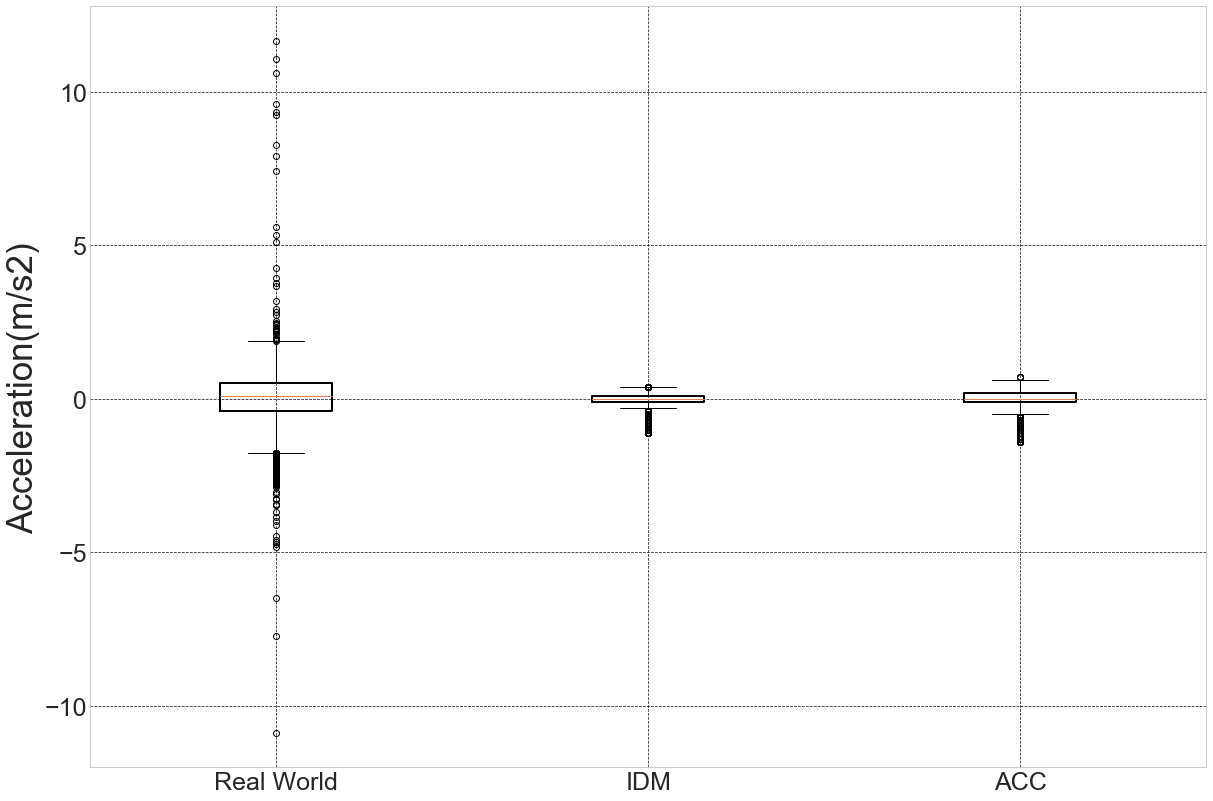

In [110]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
data_1 = ac5r[0]
data_2 = ac5i[0]
data_3 = ac5['ac5']
datab = [data_1, data_2, data_3]
# Creating plot
plt.boxplot(datab, boxprops= dict(linewidth=2.0, color='black'))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.ylabel('Acceleration(m/s2)', size = 35)
plt.xticks([1, 2, 3], ['Real World', 'IDM', 'ACC'])
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.savefig("Cali_AV4bx.jpg", dpi=300)
plt.show()

In [76]:
ac2r[0].describe()

count    7062.000000
mean       -0.006565
std         0.424392
min        -1.812139
25%        -0.233146
50%         0.019059
75%         0.221505
max         6.072222
Name: 0, dtype: float64

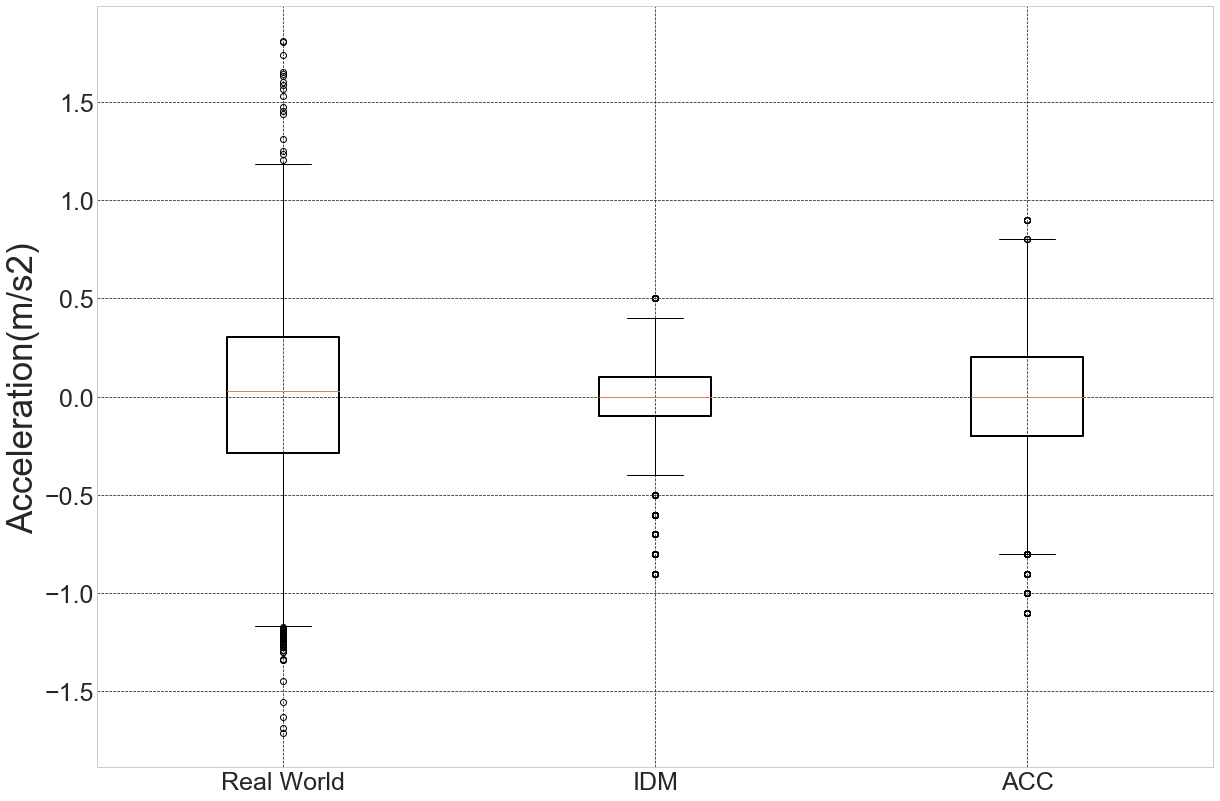

In [77]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
data_1 = ac3r[0]
data_2 = ac3i[0]
data_3 = ac3['ac3']
datab = [data_1, data_2, data_3]
# Creating plot
plt.boxplot(datab, boxprops= dict(linewidth=2.0, color='black'))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.ylabel('Acceleration(m/s2)', size = 35)
plt.xticks([1, 2, 3], ['Real World', 'IDM', 'ACC'])
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.savefig("AV2bx.jpg", dpi=300)
plt.show()

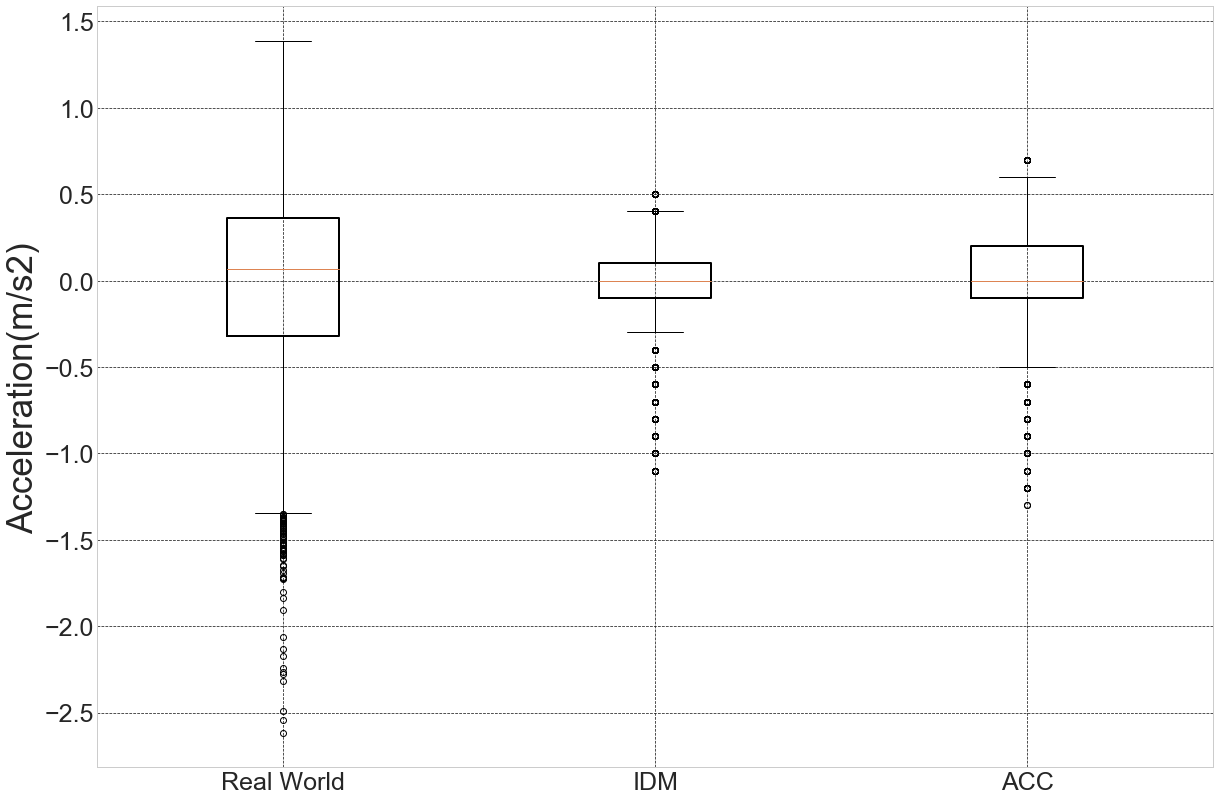

In [78]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
data_1 = ac4r[0]
data_2 = ac4i[0]
data_3 = ac4['ac4']
datab = [data_1, data_2, data_3]
plt.boxplot(datab, boxprops= dict(linewidth=2.0, color='black'))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.ylabel('Acceleration(m/s2)', size = 35)
plt.xticks([1, 2, 3], ['Real World', 'IDM', 'ACC'])
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.savefig("AV3bx.jpg", dpi=300)
plt.show()

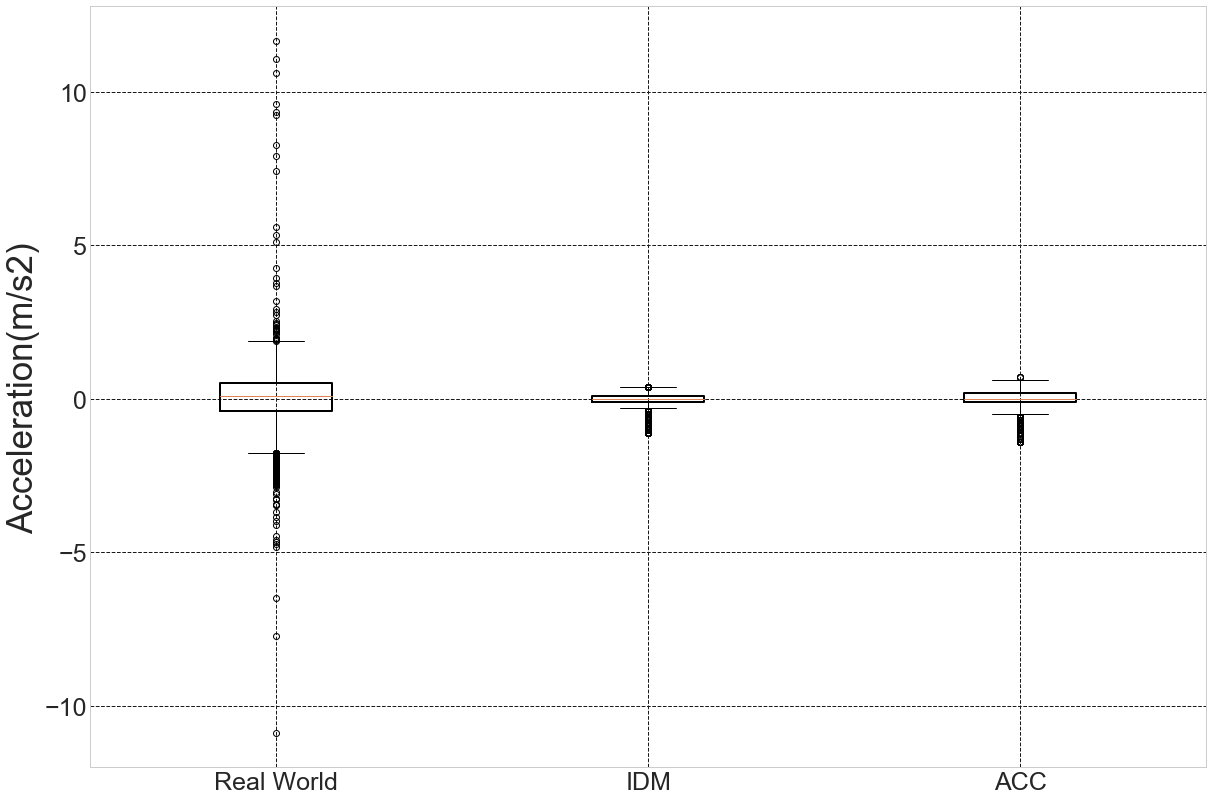

In [79]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
data_1 = ac5r[0]
data_2 = ac5i[0]
data_3 = ac5['ac5']
datab = [data_1, data_2, data_3]
# Creating plot
plt.boxplot(datab, boxprops= dict(linewidth=2.0, color='black'))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.ylabel('Acceleration(m/s2)', size = 35)
plt.xticks([1, 2, 3], ['Real World', 'IDM', 'ACC'])
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.rcParams.update({'font.size': 35})
plt.savefig("AV4bx.jpg", dpi=300)
plt.show()